In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn

torch.manual_seed(5)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Logistic Regression


## make Data

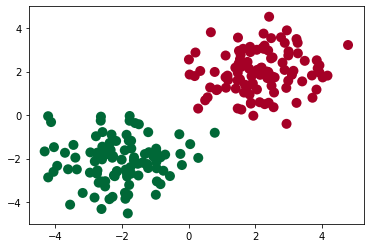

cat= 
 tensor([[ 3.8423,  2.5189,  0.0000],
        [ 0.2881,  0.2986,  0.0000],
        [ 4.0194,  1.7314,  0.0000],
        [ 1.8693,  0.5626,  0.0000],
        [ 2.3908,  1.9810,  0.0000],
        [ 0.6473,  1.2692,  0.0000],
        [ 2.9879,  1.5806,  0.0000],
        [ 1.4151,  1.2177,  0.0000],
        [ 4.7799,  3.2220,  0.0000],
        [ 1.6636,  1.0349,  0.0000],
        [ 1.8703,  1.3982,  0.0000],
        [ 2.1450,  1.8502,  0.0000],
        [ 1.5626,  2.7792,  0.0000],
        [ 1.9417, -0.0305,  0.0000],
        [ 3.4829,  2.4940,  0.0000],
        [ 2.2492,  3.7470,  0.0000],
        [ 1.7383,  1.2676,  0.0000],
        [ 3.6980,  1.8208,  0.0000],
        [ 3.9231,  2.2879,  0.0000],
        [ 2.9368, -0.4031,  0.0000],
        [ 1.8521,  2.8967,  0.0000],
        [ 2.5481,  0.3609,  0.0000],
        [ 0.1847,  1.7934,  0.0000],
        [ 1.4740,  0.3023,  0.0000],
        [ 2.8168,  2.4096,  0.0000],
        [ 2.2162,  3.0898,  0.0000],
        [ 2.1730,  2.1668,  0.0

In [3]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)        # 좌표 (2, 2) 주위로 분포된 (100, 2) size의 tensor
#평균과 표준 편차가 주어진 별도의 정규 분포에서 추출한 난수의 텐서 (Tensor)를 반환합니다.
x1 = torch.normal(-2*n_data,1)       # 좌표 (-2,-2) 주위로 분포된 (100, 2) size의 tensor

y0 = torch.zeros(100,1)      # y들은 좌표가 아니고 색을 표시하기 위함
y1 = torch.ones(100,1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)

x,y =  Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy().squeeze(), s=100, lw=0, cmap='RdYlGn')
plt.show()

print('cat=', '\n',  torch.cat((x, y), 1))

## Define Logistic Model

In [4]:
linear = nn.Linear(2, 1, bias = True)

sigmoid = nn.Sigmoid()

model = nn.Sequential(linear, sigmoid)

In [5]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.4031,  0.2666]])),
             ('0.bias', tensor([0.6660]))])

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

cost_fn = nn.BCELoss()
#cost_fn = -(y * torch.log(prob) + (1 - y)* torch.log(1 - prob) ).mean() 


## Train

In [7]:
x.size()

torch.Size([200, 2])

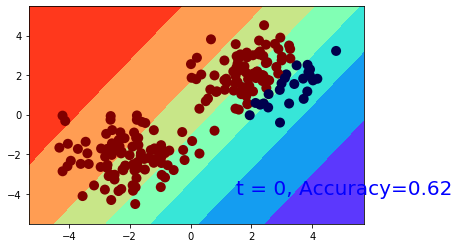

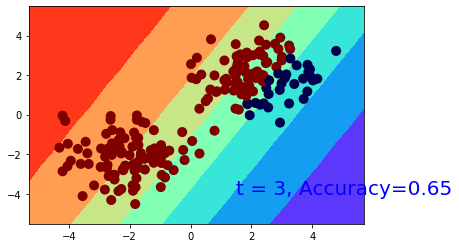

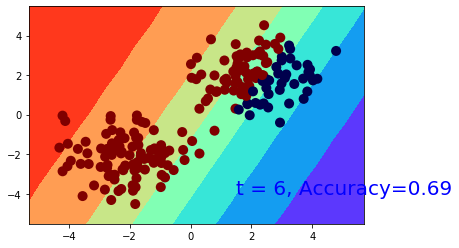

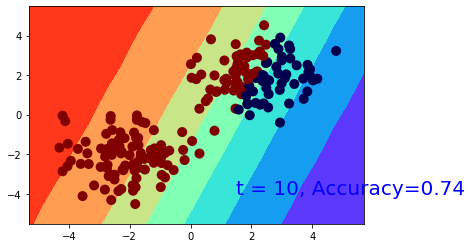

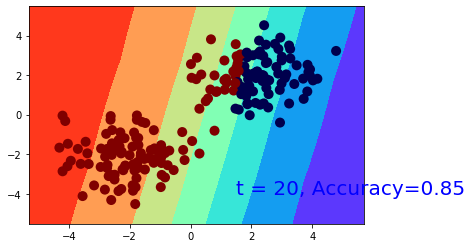

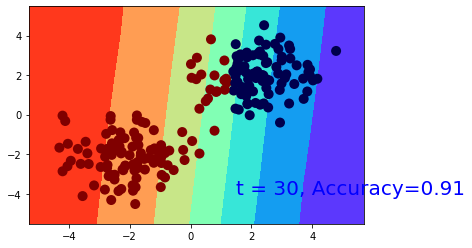

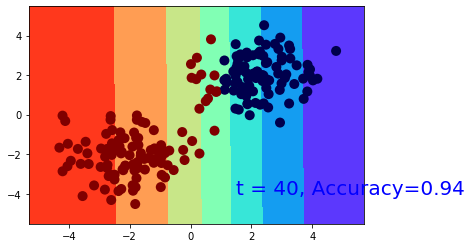

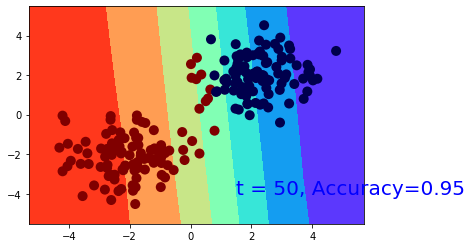

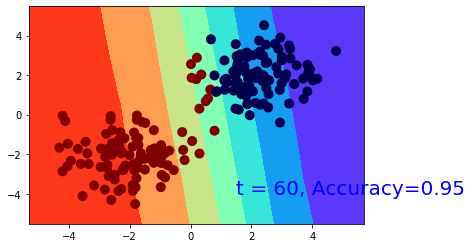

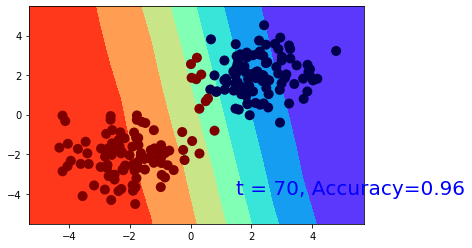

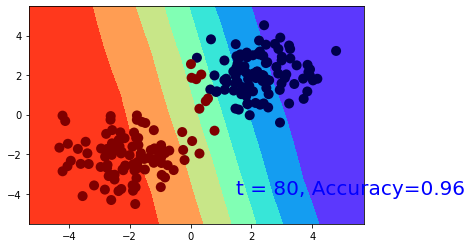

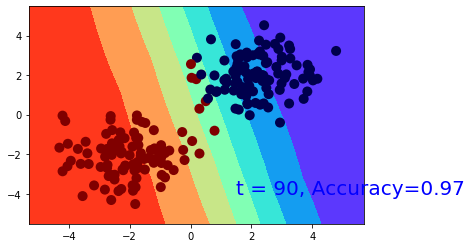

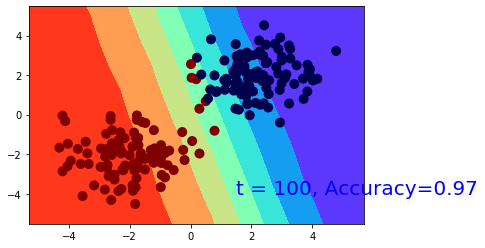

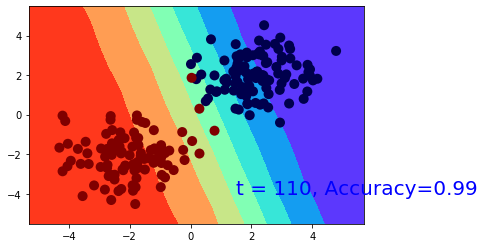

In [8]:
plt.ion()

for t in range(120):
    prob = model(x)
    cost = cost_fn(prob, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if t % 10 == 0 or t in [3,6]:
        plt.cla()   # 그림을 지움. cla():ClearAxis, clf():ClearFigure, close(): Close a figure window
        prediction = prob.gt(0.5)     # prob > 0.5
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.squeeze(1).numpy()
        
        x_min, x_max = x[:, 0].min() -1, x[:,0].max()+1
        y_min, y_max = x[:, 1].min()-1, x[:,1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                            np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))   
        # np.meshgrid(x,y) : x와 y로 조합할 수 있는 모든 좌표를 만들어냄. 
        # np.arrange(start, end, step)
        
        Z = model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).float())
        
        Z  = Z.view(xx.shape)
        plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.rainbow)   # 원래 plt.cm.binary였으나 plt.cm.rainbow로 바꿔봄
        
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y, s=100,lw=0,cmap='seismic')
        #RdYlGn
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 't = %d, Accuracy=%.2f' % (t, accuracy), fontdict={'size': 20, 'color':  'Blue'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()

# Softmax REgression

## make data

In [9]:
torch.manual_seed(5)
nb_classes = 3


x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5],
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = Variable(torch.Tensor(x_data))
Y = Variable(torch.Tensor(y_data))

_, Y_label = Y.max(dim=1)
# 1 - - - 부분중 어디가 제일 큰지 즉 1인 부분을 찾는 방법
print(Y_label)

tensor([2, 2, 2, 1, 1, 1, 0, 0])


## define Model

In [10]:
linear = torch.nn.Linear(4,3,bias=True)

model = torch.nn.Sequential(linear)

In [11]:
model

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)

## define Optimizer and Cost function

In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
cost_fn = nn.CrossEntropyLoss()
#loss(x, class) = weights[class] * (-x[class] + log(\sum_j exp(x[j])))

## Train

In [13]:
for step in range(100001):
    prediction = model(X)
    cost = cost_fn(prediction, Y_label)
    optimizer.zero_grad()
    
    cost.backward()
    optimizer.step()
    
    if step % 200 == 0:
        print(step,cost.data.numpy())

0 2.8914483
200 0.5431113
400 0.4468893
600 0.37097114
800 0.29819426
1000 0.2395479
1200 0.21667826
1400 0.19774142
1600 0.1817549
1800 0.16808175
2000 0.15625933
2200 0.14594127
2400 0.13686192
2600 0.12881462
2800 0.12163562
3000 0.11519393
3200 0.10938321
3400 0.104116514
3600 0.09932198
3800 0.094939575
4000 0.090919405
4200 0.08721868
4400 0.08380133
4600 0.08063641
4800 0.07769732
5000 0.07496091
5200 0.07240717
5400 0.07001877
5600 0.06778009
5800 0.06567782
6000 0.0636998
6200 0.0618357
6400 0.060075775
6600 0.05841176
6800 0.05683615
7000 0.05534191
7200 0.053923283
7400 0.052574515
7600 0.051290557
7800 0.050067022
8000 0.048899755
8200 0.04778504
8400 0.046719376
8600 0.04569954
8800 0.044722732
9000 0.043786313
9200 0.042887855
9400 0.0420252
9600 0.041196063
9800 0.040398728
10000 0.039631255
10200 0.038892154
10400 0.038179804
10600 0.037492786
10800 0.03682982
11000 0.036189716
11200 0.035571154
11400 0.034973152
11600 0.034394786
11800 0.033835035
12000 0.033293158
122

91400 0.0044746897
91600 0.0044649434
91800 0.0044552265
92000 0.004445554
92200 0.0044359113
92400 0.0044263117
92600 0.0044167424
92800 0.004407217
93000 0.0043977057
93200 0.0043882676
93400 0.0043788147
93600 0.004369466
93800 0.004360117
94000 0.0043508564
94200 0.00434167
94400 0.004332543
94600 0.0043234453
94800 0.0043143476
95000 0.0043052793
95200 0.004296241
95400 0.004287275
95600 0.004278339
95800 0.0042694174
96000 0.0042605246
96200 0.0042516775
96400 0.0042428444
96600 0.0042340714
96800 0.004225297
97000 0.0042165676
97200 0.0042078528
97400 0.0041991966
97600 0.0041906144
97800 0.0041820323
98000 0.004173495
98200 0.0041650306
98400 0.0041565956
98600 0.0041481755
98800 0.00413983
99000 0.0041315276
99200 0.004123226
99400 0.004114954
99600 0.0041066813
99800 0.0040984536
100000 0.00409024


In [14]:
# Testing & One-hot encoding
print('--------------')
a = model(Variable(torch.Tensor([[1, 11, 7, 9]])))
print(a.data.numpy(), torch.max(a, 1)[1].data.numpy())

print('--------------')
b = model(Variable(torch.Tensor([[1, 3, 4, 3]])))
print(b.data.numpy(), torch.max(b, 1)[1].data.numpy())

print('--------------')
c = model(Variable(torch.Tensor([[1, 1, 0, 1]])))
print(c.data.numpy(), torch.max(c, 1)[1].data.numpy())

print('--------------')
all = model(Variable(torch.Tensor([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]])))
print(all.data.numpy(), torch.max(all, 1)[1].data.numpy())

--------------
[[-8.709281 19.093235 -6.161126]] [1]
--------------
[[10.1393175 -1.557245  -6.545203 ]] [0]
--------------
[[-32.766483   4.604618  28.751602]] [2]
--------------
[[ -8.70927   19.093233  -6.161126]
 [ 10.139316  -1.557245  -6.545205]
 [-32.766483   4.604618  28.751602]] [1 0 2]
